In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.db import *
from scripts.plots import *
from scripts.stats import *
from scripts.statsTransferencia import *
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

resumen = dataNumerica()
data = pd.DataFrame.from_dict(resumen, orient='index')

#Trasnformamos los valores que interesan en columnas (Por ahora voy a hacer todo en angulos)
dataTest = pd.DataFrame()
dataTestI = pd.DataFrame()
dataTestF = pd.DataFrame()
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTestI["I"+col] = data['TestInicialAngulos'].map(lambda x: x[i])
    dataTest["I"+col] = data['TestInicialAngulos'].map(lambda x: x[i])
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTestF["F"+col] = data['TestFinalAngulos'].map(lambda x: x[i])
    dataTest["F"+col] = data['TestFinalAngulos'].map(lambda x: x[i]) 

/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:536: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_FaseActiva].replace('ExperimentoCompleto', 'TestFinal', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:508: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('A30', 'P30', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:510: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('P30', 'CONTROL', inplace=True)


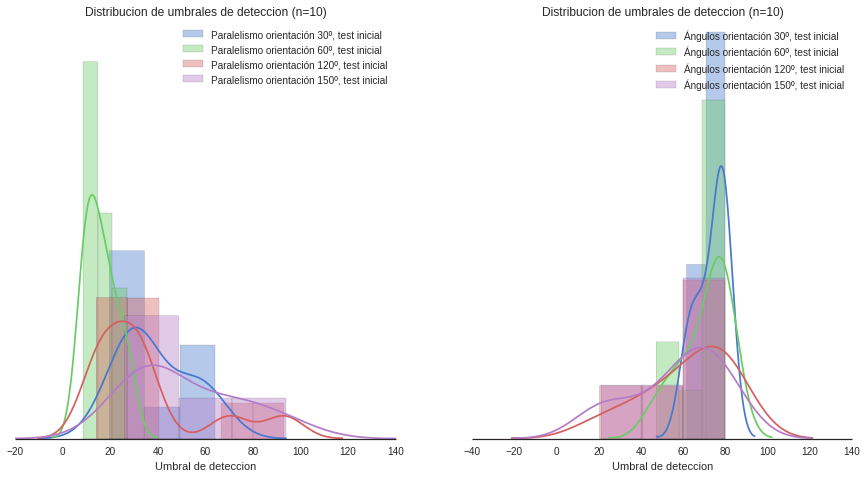

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.despine(left=True)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,7.5)



cosas = dataTest[['IP30','IP60','IP120','IP150']]
cosas.columns = ['Paralelismo orientación 30º, test inicial', 'Paralelismo orientación 60º, test inicial','Paralelismo orientación 120º, test inicial','Paralelismo orientación 150º, test inicial']
for col_id in cosas.columns:
    sns.distplot(cosas[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[0])

cosas = dataTest[['IA30','IA60','IA120','IA150']]
cosas.columns = ['Ángulos orientación 30º, test inicial', 'Ángulos orientación 60º, test inicial','Ángulos orientación 120º, test inicial','Ángulos orientación 150º, test inicial']
for col_id in cosas.columns:
    sns.distplot(cosas[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[1])

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title('Distribucion de umbrales de deteccion (n=10)')
    ax[i].legend()
    
fig.savefig('./Images/TransferenciaTestInicialHistogramasTotales', bbox_inches='tight')

In [9]:
dataTest

,IP30,IP60,IP120,IP150,IA30,IA60,IA120,IA150,FP30,FP60,FP120,FP150,FA30,FA60,FA120,FA150
Sujeto01,57.5,17.0,34.0,39.5,79.6,78.4,79.6,79.6,27.6,9.2,12.0,8.8,32.8,16.8,77.6,71.6
Sujeto02,54.5,19.5,70.0,37.5,78.0,76.0,59.6,22.4,24.8,9.6,15.2,36.4,20.8,26.8,12.8,35.2
Sujeto03,30.0,18.0,34.5,26.0,70.8,77.2,48.4,21.2,13.6,10.0,16.0,31.2,70.8,38.4,52.4,36.4
Sujeto04,28.0,10.5,28.5,34.5,79.6,68.8,61.6,42.0,29.2,5.2,8.4,49.6,78.4,54.8,46.4,36.0
Sujeto05,30.0,8.5,16.5,34.5,77.2,56.8,38.0,55.6,11.2,12.0,6.4,14.0,50.0,31.6,36.0,25.2
Sujeto06,64.0,27.0,30.0,68.0,63.2,78.4,79.2,79.6,20.4,19.2,33.2,16.8,78.4,44.4,79.6,79.6
Sujeto07,19.5,10.0,93.0,80.0,77.6,79.6,74.4,62.0,27.6,10.4,13.2,26.8,23.6,54.0,31.2,18.0
Sujeto08,32.0,13.0,14.0,40.0,67.6,47.2,79.6,66.0,29.6,11.6,12.8,30.8,69.2,14.0,79.2,67.6
Sujeto09,31.5,25.5,22.0,63.0,61.6,61.6,20.4,74.8,27.6,18.0,50.4,68.4,77.2,70.4,79.6,76.8
Sujeto10,43.5,11.0,15.0,94.0,79.6,79.6,79.6,67.6,34.8,27.6,4.0,10.4,51.6,79.6,79.6,74.8
